In [1]:
import numpy as np 
import matplotlib.pyplot as plt

### Exercise 3.1

How does the shift effect appear in the $p$-value histogram? 

### Exercise 3.2
- (a) Verify (3.18). 



- (b) Show that (3.17) improves on (3.13) in the sense of making it easier to reject every $H_{0 i}$ at any given level $\alpha$. 



- (c) Show that the Sidák procedure is $\mathrm{FWER}_\alpha$ if the $p$-values $p_{1}, p_{2}, \ldots, p_{N}$ are statistically independent.

### Solution 
- (a)  Equation (3.18):  $  \tilde{p}_{i}=1-\left(1-p_{i}\right)^{N}$. <br>
    By the definition of adjusted $p$- value: $\tilde{p}_{i}(\boldsymbol{x}) =\inf\limits_{\alpha} \left\{H_{0 i} \text{ rejected by FWER}_{\alpha} (\boldsymbol{x})\right\}$. <br>
Then $H_{0i}$ is rejected iff: 
\begin{align}
    &p_{i} \leq 1-(1-\alpha)^{1 / N}\\
\iff & (1 - \alpha)^{1/N} \leq  1- p_i \\
\iff & \alpha \ge 1- (1 - p_i)^N
\end{align}
    Therefore 
$$ \tilde{p}_i = \inf\limits_{\alpha}\{ {\alpha \ge 1 - (1 - p_i)^N} \} = 1 - (1 - p_i)^N. $$

- (b) Equation (3.13): $p_i ≤ \alpha/N. $ <br>
It suffices to prove that 
$$\alpha/N \le 1- (1- \alpha)^{1/N}$$ <br>
or
$$1 - \alpha \le (1 - \alpha/N)^ N,$$ <br>
which is true since 
$$ (1 - \alpha/N)^ N \nearrow e^{-\alpha} $$
and
$$ (1 - \alpha/N)^ N = 1 - \alpha \text{  when  } N = 1 $$

- (c) Under independence assumption:<br> 

\begin{align}
\mathrm{FWER}_\alpha 
&= Pr\left ( \bigcup_{I_0} \left\{ p_i \le 1-(1 - \alpha)^{1/N}\right\} \right )\\
&= 1 - Pr\left ( \bigcap_{I_0} \left \{ p_i > 1-(1 - \alpha)^{1/N}\right \} \right )\\
&= 1 -  \prod_{I_0} Pr\left ( \left \{ p_i > 1-(1 - \alpha)^{1/N}\right \} \right )\\
&= 1 -(1-\alpha)^{N_0/N}\\
&\le \alpha
\end{align}

Text(0,0.5,'reject threshold')

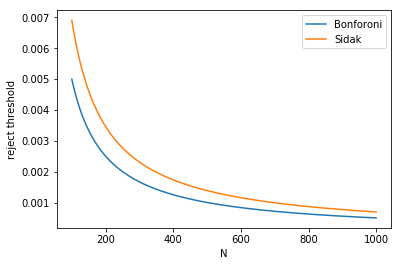

In [21]:
# visualization of difference between bonforoni and sidak method 
N = np.arange(100, 1000)
alpha = 0.5
Bonforoni = alpha/N
Sidak = 1 - (1- alpha)**(1/N)
plt.plot(N, Bonforoni, label = 'Bonforoni')
plt.plot(N, Sidak, label = 'Sidak')
plt.legend()
plt.xlabel('N')
plt.ylabel('reject threshold')

### Exercise 3.3
Show that the adjusted $p$-value for Holm's procedure is

$$\tilde{p}_{(i)}=\max _{j \leq i}\left\{(N-j+1) p_{(j)}\right\}_{1}$$

where $\{x\}_{1} \equiv \min (x, 1)$ as before.

### Solution
**Holm's procedure**: the $H_{0(i)}$ is rejected if 
$$ p_{(j)} \le \frac{\alpha}{N-j+1} \text{ for } j = 1,2 \ldots, i \tag{3.20}.$$ 
By the definition of adjusted $p$-value: 
\begin{align}
    \tilde{p}_{(i)} 
    &= \inf\limits_{\alpha} \left\{H_{0 (i)} \text{ rejected by FWER}_{\alpha}(\boldsymbol{x})\right\}  \\
    &= \inf\limits_{\alpha} \left\{p_{(j)} \le \frac{\alpha}{N-j+1}\text{ for } j=1,2, \ldots, i\right\} \\ 
    &= \inf\limits_{\alpha} \left\{ \alpha \ge ({N-j+1})p_{(j)} \text{ for } j=1,2, \ldots, i\right\} \\ 
    &= \max _{j \leq i}\left\{(N-j+1) p_{(j)}\right\}_{1}
\end{align}


### Exercise 3.4 
Suppose that all $N$ hypotheses $H_{0 i}$ are true and that the $N p$-values are mutually independent.

Calculate the distribution of $\tilde{p}_{(1)}= \{N p_{(1)}\}_{1}.$ 

What is the limiting distribution as $N$ goes to infinity?

### Solution 
Under the null hypothesis, $p \sim \mathcal{U}(0,1)$. 

Thus $p_{(1)} \sim f(x)$, where $f(x) = N(1-F)^{N-1}f = N(1 -  x)^{N-1}$. 

Hence 
\begin{align}
     Pr(\tilde{p}_{(1)} < t) 
     &= P( \{N p_{(1)}\}_{1} < t)\\
     &= \int_0^{t/N} N(1-x)^{N-1} dx\\
     &= 1- (1-t/N)^N.
\end{align}

The limiting distribution is $ F(t) = 1 - e^{-t}$.

### Exercise 3.5 
Explicate in detail the three steps in $(3.24)$ and the conclusion that follows.

#### Theorem 
Holm’s method satisfies the $\textrm{FWER}$ control property.

#### Proof
PLet $I_{0}$ be the set of indices corresponding to true null hypotheses $H_{0 i}, N_{0}=\# I_{0}$ the number of members of $I_{0},$ and $i_{0}=N-N_{0}+1 .$ 

Also let $\hat{i}$ be the stopping index for Holm's procedure, i.e., the maximum index satisfying $(3.20) .$ The event
\begin{align} 
A=\left\{p_{(i)}>\frac{\alpha}{N_{0}} \text { for all } i \in I_{0}\right\} 
& \Longrightarrow\left\{p_{(i_0)}>\frac{\alpha}{N_{0}}=\frac{\alpha}{N+1-i_{0}}\right\} \\
& \Longrightarrow\left\{\hat{i}<i_{0}\right\} \Longrightarrow\left\{p_{(\hat{i})}<\frac{\alpha}{N_{0}}\right\} \equiv B \tag{3.24}
\end{align}

However the Bonferroni bound shows that $\operatorname{Pr}\{A\} \geq 1-\alpha,$ and $B$ implies
that none of the true null hypotheses have been rejected.

### Solution to 3.5


- If $p_{(i)}>\frac{\alpha}{N_{0}} \text { for all } i \in I_{0}$,then the smallest $p_{(i)} \in I_0$, called $p^{I_0}_{(1)}$ must greater than $\alpha/N_0$. And $p_{(i_0)} \ge p^{I_0}_{(1)}$, hence
$$A=\left\{p_{(i)}>\frac{\alpha}{N_{0}} \text { for all } i \in I_{0}\right\} 
\Longrightarrow \left\{p_{(i_0)}>\frac{\alpha}{N_{0}}=\frac{\alpha}{N+1-i_{0}}\right\} .$$

- Since $\hat{i}$ is the largest index satisfying $(3.20)$, then 
$$\left\{p_{(i_0)}>\frac{\alpha}{N_{0}}=\frac{\alpha}{N+1-i_{0}}\right\} 
\Longrightarrow \left\{\hat{i}<i_{0}\right\} $$
(Here might be a typo. It should be $\left\{\hat{i}\le i_{0}\right\}$.

- If $\hat{i}\le i_{0}$, 
\begin{align}
p_{(\hat{i})} <& \frac{\alpha}{N - \hat{i} + 1} 
 <\frac{\alpha}{N - i_0 + 1}
 = \frac{\alpha}{N_0}. 
\end{align}

Therefore, 

$$P(B) \ge P(A) \ge 1-\alpha$$

For any $i \le \hat{i}$, 

$$p_{(j)} < p_{(\hat{i})} < \frac{\alpha}{N_0} < \frac{\alpha}{N- j +1} \text{  for }j = 1, 2, \ldots, i .$$

Thus
\begin{align}
\mathrm{FWER} = & Pr\{\text{Reject any true }H_{0i}\}\\
= &\Pr\{\bigcup_{i \in I_0} H_{0i} \text{ rejected }\}\\
\le & \sum_{i \in I_0} Pr\{ H_{0i} \text{ rejected}\}\\
\le & N_0\cdot \frac{\alpha}{N_0} = \alpha
\\
\\
= & Pr\{\text{None of } H_{0i} \text{ is rejected} \}\\
= & Pr\{\bigcap_{i \in I_0} \{H_{0i} \text{ not rejected}\}\\
\ge & Pr\left\{p_{(\hat{i})}<\frac{\alpha}{N_{0}}\right\} 
\end{align}

<font color = red > to be continue </font>

### Exercise 3.6 

Complete the proof that Holm’s procedure is $\textrm{FWER}_\alpha$.